In [0]:
!pip install --upgrade pip
!pip uninstall tensorflow
!pip install tensorflow

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Found existing installation: tensorflow 2.2.0
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/autodiff/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/compat/v1/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/compat/v2/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/debugging/experimental/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/linalg/experimental/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/lite/experimental/microfrontend/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/compat/v1/math/special/

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikatulnerkar","key":"5942789c24a612cf5da8a068414168d7"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset

 99% 1.18G/1.19G [00:10<00:00, 122MB/s]
100% 1.19G/1.19G [00:10<00:00, 123MB/s]


In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:35<00:00, 82.8MB/s]
100% 2.29G/2.29G [00:35<00:00, 68.6MB/s]


In [6]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


In [7]:
from zipfile import ZipFile
file_name = "coronahack-chest-xraydataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done!")

Done!


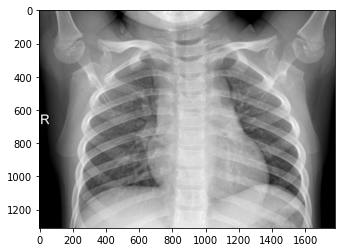

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/Data"

CATEGORIES = ["Corona", "Pneumonia"]

for category in CATEGORIES:  
    if(category == "Corona"):
        path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
    else:
        path = "/content/chest_xray/train/PNEUMONIA "
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [10]:
print(img_array.shape)

(1310, 1782)


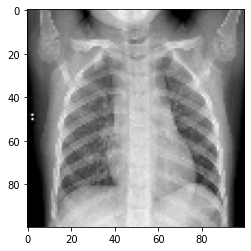

In [11]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

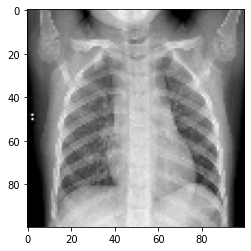

In [12]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        # path = os.path.join(DATADIR,category)  

        if(category == "Corona"):
           path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
        else:
           path = "/content/chest_xray/train/PNEUMONIA"

        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 3875/3875 [00:20<00:00, 189.53it/s]

9184


In [14]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
0
0
1
0
1


In [15]:
import numpy

X1 = []
y1 = []

for features,label in training_data:
    X1.append(features)
    y1.append(label)

X = numpy.array(X1)
y = numpy.array(y1)

print(type(X))
print(type(y))

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  6]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  6]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [ 57]
   [245]
   [239]]

  [[  1]
   [  0]
   [  0]
   ...
   [ 63]
   [162]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [19]:
damn = model.fit(X, y, batch_size=32, epochs=15, validation_split=0.3)

Epoch 1/15
201/201 [==============================] - 8s 39ms/step - loss: 0.7344 - accuracy: 0.5751 - val_loss: 0.6646 - val_accuracy: 0.5635
Epoch 2/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6495 - accuracy: 0.5787 - val_loss: 0.6669 - val_accuracy: 0.5562
Epoch 3/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6362 - accuracy: 0.5835 - val_loss: 0.6515 - val_accuracy: 0.5428
Epoch 4/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6335 - accuracy: 0.5812 - val_loss: 0.6708 - val_accuracy: 0.5512
Epoch 5/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6298 - accuracy: 0.5806 - val_loss: 0.6595 - val_accuracy: 0.5323
Epoch 6/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6241 - accuracy: 0.5899 - val_loss: 0.6749 - val_accuracy: 0.5276
Epoch 7/15
201/201 [==============================] - 7s 36ms/step - loss: 0.6209 - accuracy: 0.5881 - val_loss: 0.6886 - val_accuracy: 0.5323

In [20]:
print("Evaluation : ")

test_scores = model.evaluate(X, y)

print("Test Loss : ", test_scores[0])
print("Test Accuracy : ", test_scores[1])

Evaluation : 
287/287 [==============================] - 3s 12ms/step - loss: 0.6304 - accuracy: 0.5769
Test Loss :  0.6304207444190979
Test Accuracy :  0.5768728256225586


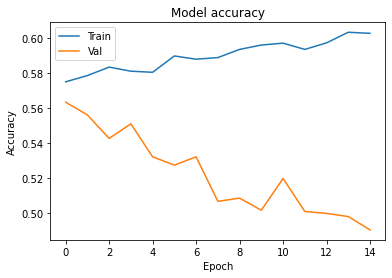

In [21]:
plt.plot(damn.history['accuracy'])
plt.plot(damn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

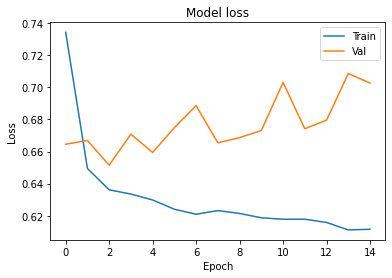

In [22]:
plt.plot(damn.history['loss'])
plt.plot(damn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [23]:
from keras.models import load_model
model.save('my_model.h5')

Using TensorFlow backend.


In [0]:
from keras.models import load_model
model = load_model('my_model.h5')